<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2020/2 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2020p2/notas_de_aula/16.00-Comparacao_de_modelos.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2020p2%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/16.00-Comparacao_de_modelos.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2020p2/notas_de_aula/slides/16.00-Comparacao_de_modelos.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 15. Validação de modelos](15.00-Validacao_do_modelo.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) 

---


# Comparação de modelos

- Entropia
- AIC
- AICc
- BIC

In [1]:
using Random
using Statistics
using LinearAlgebra
using Plots
theme(:ggplot2)

## Critério de AIC

- O critério de informação de Akaike *(Akaike Information Criteria)* é uma medida relativa da qualidade do ajuste.

- Ele penaliza modelos com muitos parâmetros.

- Entre modelos com RMS próximos, o critério ajuda a selecionar o que tem menos parâmetros (menos custoso).

- É definido por

$$ \mathrm{AIC} = N\ln E_k + 2(k+1),
$$

onde $E_k$ é o **erro quadrático médio** do modelo com $k$ parâmetros:

$$ E_k = \frac{1}{N}\sum_{j=1}^N (\hat y_j - y_j)^2 = \mathrm{RMS}_k(r_j)^2 = \frac{\mathrm{SS}_k(r_i)}{N},
$$

- É comum vermos escrito na forma

$$ \mathrm{AIC} = N\ln\left(\frac{\mathrm{SS}_k(r_i)}{N}\right) + 2(k+1).
$$


## AIC corrigido

- O critério AIC vem de Teoria da Informação:

    - Assumindo que os dados são gerados por um certo processo desconhecido $\mathcal{P}$;
    
    - E que há $J$ candidatos a modelos do processo, $\mathcal{M_j}$, $j=1, \ldots, N$;
    
    - $\mathrm{AIC}_j$ é uma medida da perda de informação obtida usando-se o modelo $j$.
    
    - O modelo com o menor AIC é o modelo com a menor perda de informação.
    
- Mas, como tal, ele vem de um resultado assintótico e é mais utilizado quando há um número relativamente grande de dados, da ordem de

$$ \frac{N}{K} \gtrsim 40,
$$

onde $K=\max k$ é o número de parâmetros do modelo com mais parâmetros dentre os modelos considerados

- Caso não haja dados suficientes, utiliza-se o **AIC corrigido:**

$$ \mathrm{AICc} = N\ln\left(\frac{\mathrm{SS}_k(r_i)}{N}\right) + 2(k+1) + \frac{2(k+1)(k+2)}{n-k-1}.
$$

## BIC (Bayesian Information Criteria)

Este é um outro critério muito próximo do AIC e é definido por

$$ \mathrm{BIC} = N\ln(E_k) + (k+1)\ln(N).
$$

## Exemplo sintético

Neste exemplo sintético, vamos 

- Construir dados sintéticos a partir de perturbações aleatórias em torno de uma determinada função.

- Perturbações uniformemente distribuídas entre $\pm 0.3$ na abscissa.

- Perturbações uniformemente distribuídas entre $\pm 1$ na ordenada.

- Em seguida, usaremos mínimos quadrados para ajustar um polinômio de grau três.

- Posteriormente, mínimos quadrados para ajustar polinômios de diversos graus.

In [2]:
function info_ajuste2(dados_x, dados_y, model_y, k)
    N = length(dados_x)
    y_mean = mean(dados_y)
    residuos = model_y - dados_y
    ss = norm(residuos)^2
    rms = sqrt(ss/N)
    ss_y = norm(dados_y)^ 2
    rms_y = sqrt(ss_y/N)

    ss_rel = ss/ss_y
    rms_rel = sqrt(ss_rel)
    ss_tot = N*var(dados_y)
    ss_reg = norm(model_y .- y_mean)^2
    r_sq = ss_reg/ss_tot
    r_sq_aj = 1 - (1 - r_sq)*(N-1)/(N-k)
    
    aic = N*log(ss/N) + 2*(k+1)
    aicc = N*log(ss/N) + 2*(k+1) + (2*(k+1)*(k+2))/(N-k-1)
    bic =  N*log(ss/N) + 2*log(N)*(k+1)
    
    return (
        residuos=residuos, rms=rms, rms_rel=rms_rel, ss=ss, ss_rel=ss_rel,
        r_sq=r_sq, r_sq_aj=r_sq_aj, aic=aic, aicc=aicc, bic=bic
    )
end

info_ajuste2 (generic function with 1 method)

In [3]:
f_modelo(x, β) = β ⋅ [x^j for j in 0:length(β)-1]
f_dados(x,β) = exp(β[4]*x) * (β[1] + β[2]*x + β[3]*x^2 + β[4]*x^3)
nothing

In [4]:
β̲ = [5.2, 0.5, -0.45, 0.05]
x = -1.0:0.1:8.0
nothing

In [5]:
dados_x = collect(0.0:0.4:7.6) .+ 0.1 * randn(MersenneTwister(15001), 20)
dados_y = f_dados.(dados_x, Ref(β̲)) .+ 0.5 * randn(MersenneTwister(15021), 20)
nothing

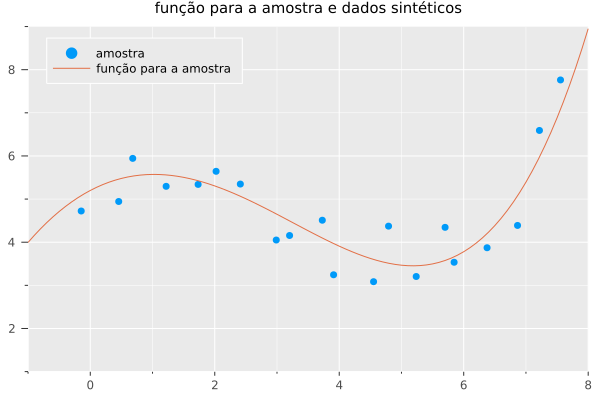

In [6]:
plot(xlim=(-1,8), ylim=(1,9), legend=:topleft,
    titlefont=10, title="função para a amostra e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
plot!(x, x->f_dados(x,β̲), label="função para a amostra")

In [7]:
max_grau = 12
β̂ = []
info = []
for grau in 0:max_grau
    A = hcat([dados_x.^j for j=0:grau]...)
    push!(β̂, A \ dados_y)
    push!(info, info_ajuste2(
            dados_x, dados_y, 
            f_modelo.(dados_x, Ref(β̂[grau+1])), length(β̂[grau+1])
            )
        )
end

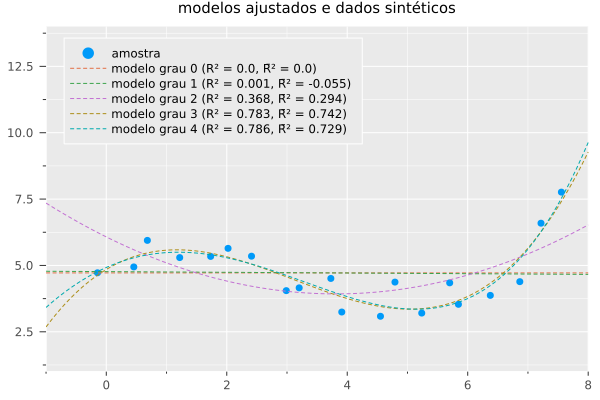

In [8]:
plot(xlim=(-1,8), ylim=(1,14), legend=:topleft,
    titlefont=10, title="modelos ajustados e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
for grau in 0:4
    plot!(x,x->f_modelo(x,β̂[grau+1]),
        label="modelo grau $grau (R² = $(round(info[grau+1].r_sq,digits=3)), R̄² = $(round(info[grau+1].r_sq_aj,digits=3)))",
        linestyle=:dash)
end
plot!()

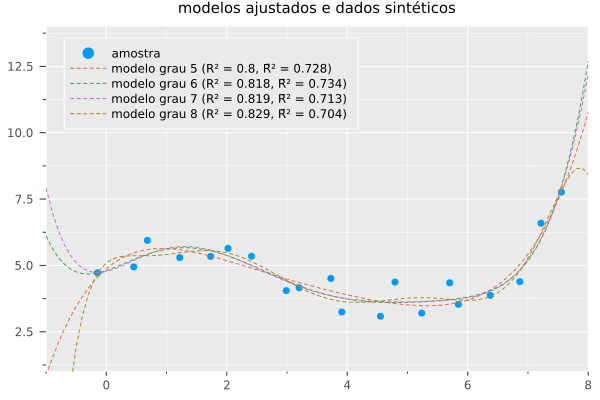

In [9]:
plot(xlim=(-1,8), ylim=(1,14), legend=:topleft,
    titlefont=10, title="modelos ajustados e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
for grau in 5:8
    plot!(x,x->f_modelo(x,β̂[grau+1]),
        label="modelo grau $grau (R² = $(round(info[grau+1].r_sq,digits=3)), R̄² = $(round(info[grau+1].r_sq_aj,digits=3)))",
        linestyle=:dash)
end
plot!()

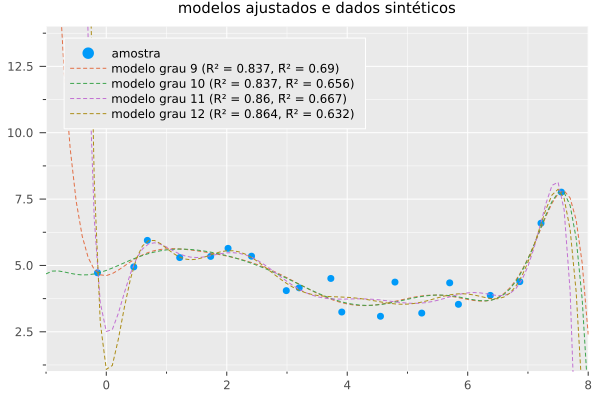

In [10]:
plot(xlim=(-1,8), ylim=(1,14), legend=:topleft,
    titlefont=10, title="modelos ajustados e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
for grau in 9:max_grau
    plot!(x,x->f_modelo(x,β̂[grau+1]),
        label="modelo grau $grau (R² = $(round(info[grau+1].r_sq,digits=3)), R̄² = $(round(info[grau+1].r_sq_aj,digits=3)))",
        linestyle=:dash)
end
plot!()

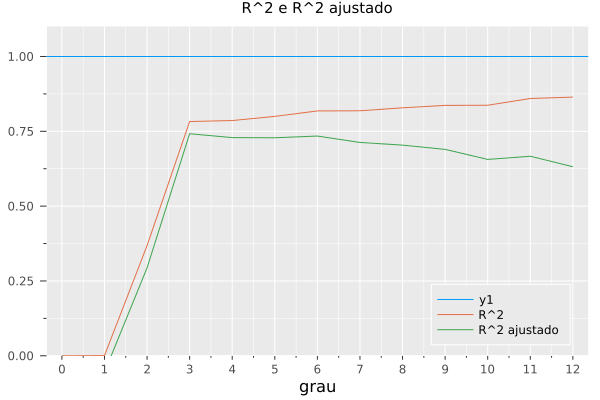

In [11]:
plot(title="R^2 e R^2 ajustado", titlefont=10, ylims=(0,1.1), legend=:bottomright,
    xlabel="grau", xticks=0:max_grau)
hline!([1.0])
plot!(0:max_grau, [info[j+1].r_sq for j in 0:max_grau], label="R^2")
plot!(0:max_grau, [info[j+1].r_sq_aj for j in 0:max_grau], label="R^2 ajustado")

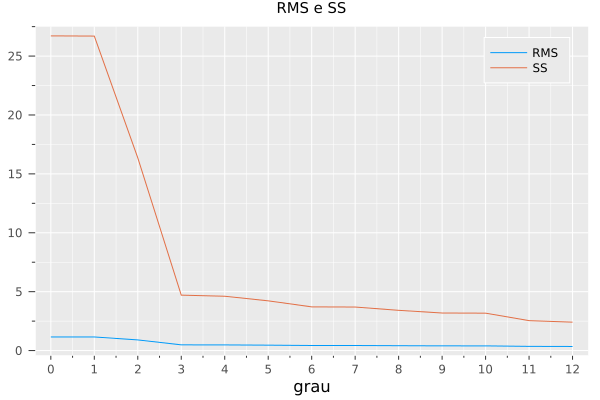

In [12]:
plot(title="RMS e SS", titlefont=10, xlabel="grau", xticks=0:max_grau)
plot!(0:max_grau, [info[j+1].rms for j in 0:max_grau], label="RMS")
plot!(0:max_grau, [info[j+1].ss for j in 0:max_grau], label="SS")

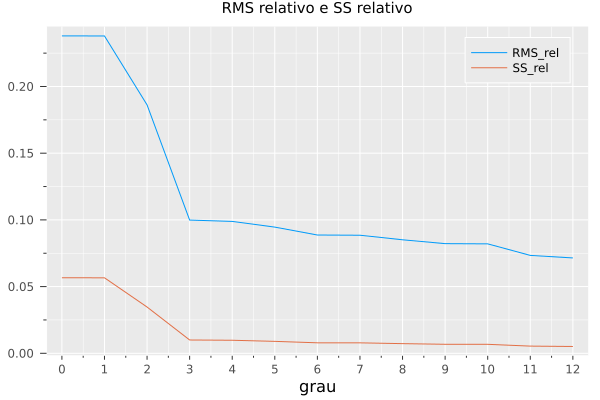

In [13]:
plot(title="RMS relativo e SS relativo", titlefont=10, xlabel="grau", xticks=0:max_grau)
plot!(0:max_grau, [info[j+1].rms_rel for j in 0:max_grau], label="RMS_rel")
plot!(0:max_grau, [info[j+1].ss_rel for j in 0:max_grau], label="SS_rel")

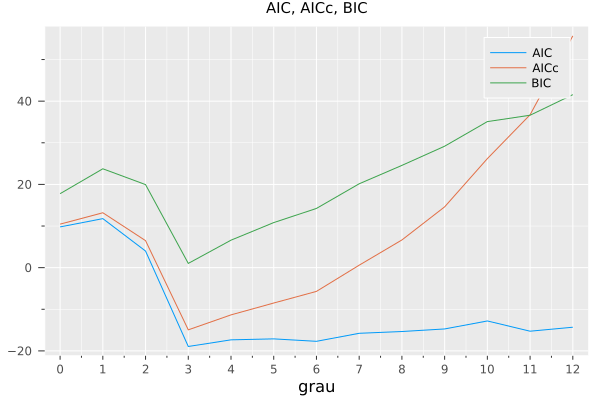

In [14]:
plot(title="AIC, AICc, BIC", titlefont=10, xlabel="grau", xticks=0:max_grau)
plot!(0:max_grau, [info[j+1].aic for j in 0:max_grau], label="AIC")
plot!(0:max_grau, [info[j+1].aicc for j in 0:max_grau], label="AICc")
plot!(0:max_grau, [info[j+1].bic for j in 0:max_grau], label="BIC")

<!--NAVIGATOR-->

---
[<- 15. Validação de modelos](15.00-Validacao_do_modelo.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) 